#머신러닝 입문

## linear regression

### 기존의 프로그래밍 방식

In [ ]:
def celsius_to_fahrenheit(x): #기존 화씨 구하는 함수
    return x *1.8 + 32  

In [ ]:
celsius_value = int(input('섭씨온도를 입력하세요.'))
print('화씨온도로', celsius_to_fahrenheit(celsius_value))

섭씨온도를 입력하세요.20
화씨온도로 68.0


### 머신러닝 방식

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_C = np.array(range(0, 100)) 
data_F = celsius_to_fahrenheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [ ]:
model = Sequential() 
model.add(InputLayer(input_shape=(1, ))) #Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합
model.add(Dense(1)) #1개의 신경
model.compile(loss='mse', optimizer='rmsprop') #선형에 좋은 rmsprop 옵티마이저 사용
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [ ]:
model.predict([0.01])

array([[-0.01712706]], dtype=float32)

In [ ]:
model.save('before_learning.h5') # 이전 모델 저장

In [ ]:
fit_hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000) #1000번 학습(문제집 1000번 풀어라!)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.2475
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.1986
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.1623
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.1288
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.0986
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.0693
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.0415
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.0159
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.9942
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 4.9680
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.9408
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.9174
Epoch 13/1000
4/4 [==============================

In [ ]:
print(model.predict([0.01]))

[[0.356394]]


In [ ]:
model.save('after_learning.h5') # 학습 된 모델 저장

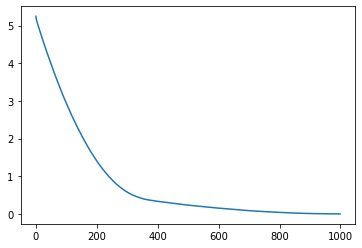

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.show()

####잡음이 있는 실제 데이터

In [ ]:
noise = np.array(np.random.normal(0, 0.05, 100)) #표준편차가 0.05인 정규분포를 따르는 랜덤값 100개
print(noise)

[-0.03443071 -0.05262863 -0.03399247  0.01376678  0.03239318  0.08588219
 -0.02032269 -0.05298213  0.00145913  0.00166127  0.00988482  0.03835062
  0.02714496 -0.01255681  0.11439671  0.06843923  0.0573876  -0.00559921
  0.0318858   0.02602208 -0.003155   -0.00399073 -0.02919921  0.09325896
 -0.00378368 -0.10293667  0.08099352  0.03228379  0.01579804 -0.01110227
 -0.00620971  0.06649525  0.09023245  0.02639043  0.04451821  0.00765932
 -0.06251118 -0.00016237 -0.00693942 -0.01062608  0.10306972  0.11386507
  0.1070932  -0.00709873 -0.05057764  0.01871028 -0.04504525 -0.02540042
  0.05186039  0.00505455 -0.04315636 -0.03078498  0.0128357   0.06396386
  0.04642535 -0.08000747  0.02438915  0.04217809  0.01843061  0.01543619
 -0.06091683  0.05500962  0.01770304 -0.0007409   0.03316792 -0.00753719
  0.04560597  0.00217062  0.05656408  0.06656322  0.00316838  0.0060147
  0.14016535  0.02087752 -0.07977219  0.03010566 -0.04083906  0.05712933
 -0.03374913 -0.03874343  0.03163739  0.03278652  0.

In [ ]:
noised_scaled_data_F = np.array([])
for data in scaled_data_F:
    noised_scaled_data_F = np.append(
        noised_scaled_data_F, np.random.normal(0, 0.05, 100) + data)
    
print(noised_scaled_data_F)
print(len(noised_scaled_data_F)) #데이터 개수

[0.30030827 0.46464545 0.27556603 ... 2.09039775 2.14279307 2.09461256]
10000


In [ ]:
noised_scaled_data_C = []  #노이즈가 섞인건 아니지만 변수명 통일을 위해
for data in range(0, 100):
    for i in range(0, 100):
        noised_scaled_data_C.append(data)
noised_scaled_data_C = np.array(noised_scaled_data_C)
noised_scaled_data_C = noised_scaled_data_C / 100
print(noised_scaled_data_C)
print(len(noised_scaled_data_C))

[0.   0.   0.   ... 0.99 0.99 0.99]
10000


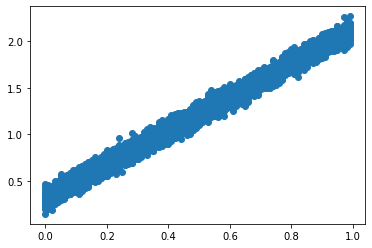

In [ ]:
plt.scatter(x=noised_scaled_data_C, y=noised_scaled_data_F) #산점도로 데이터 확인
plt.show()

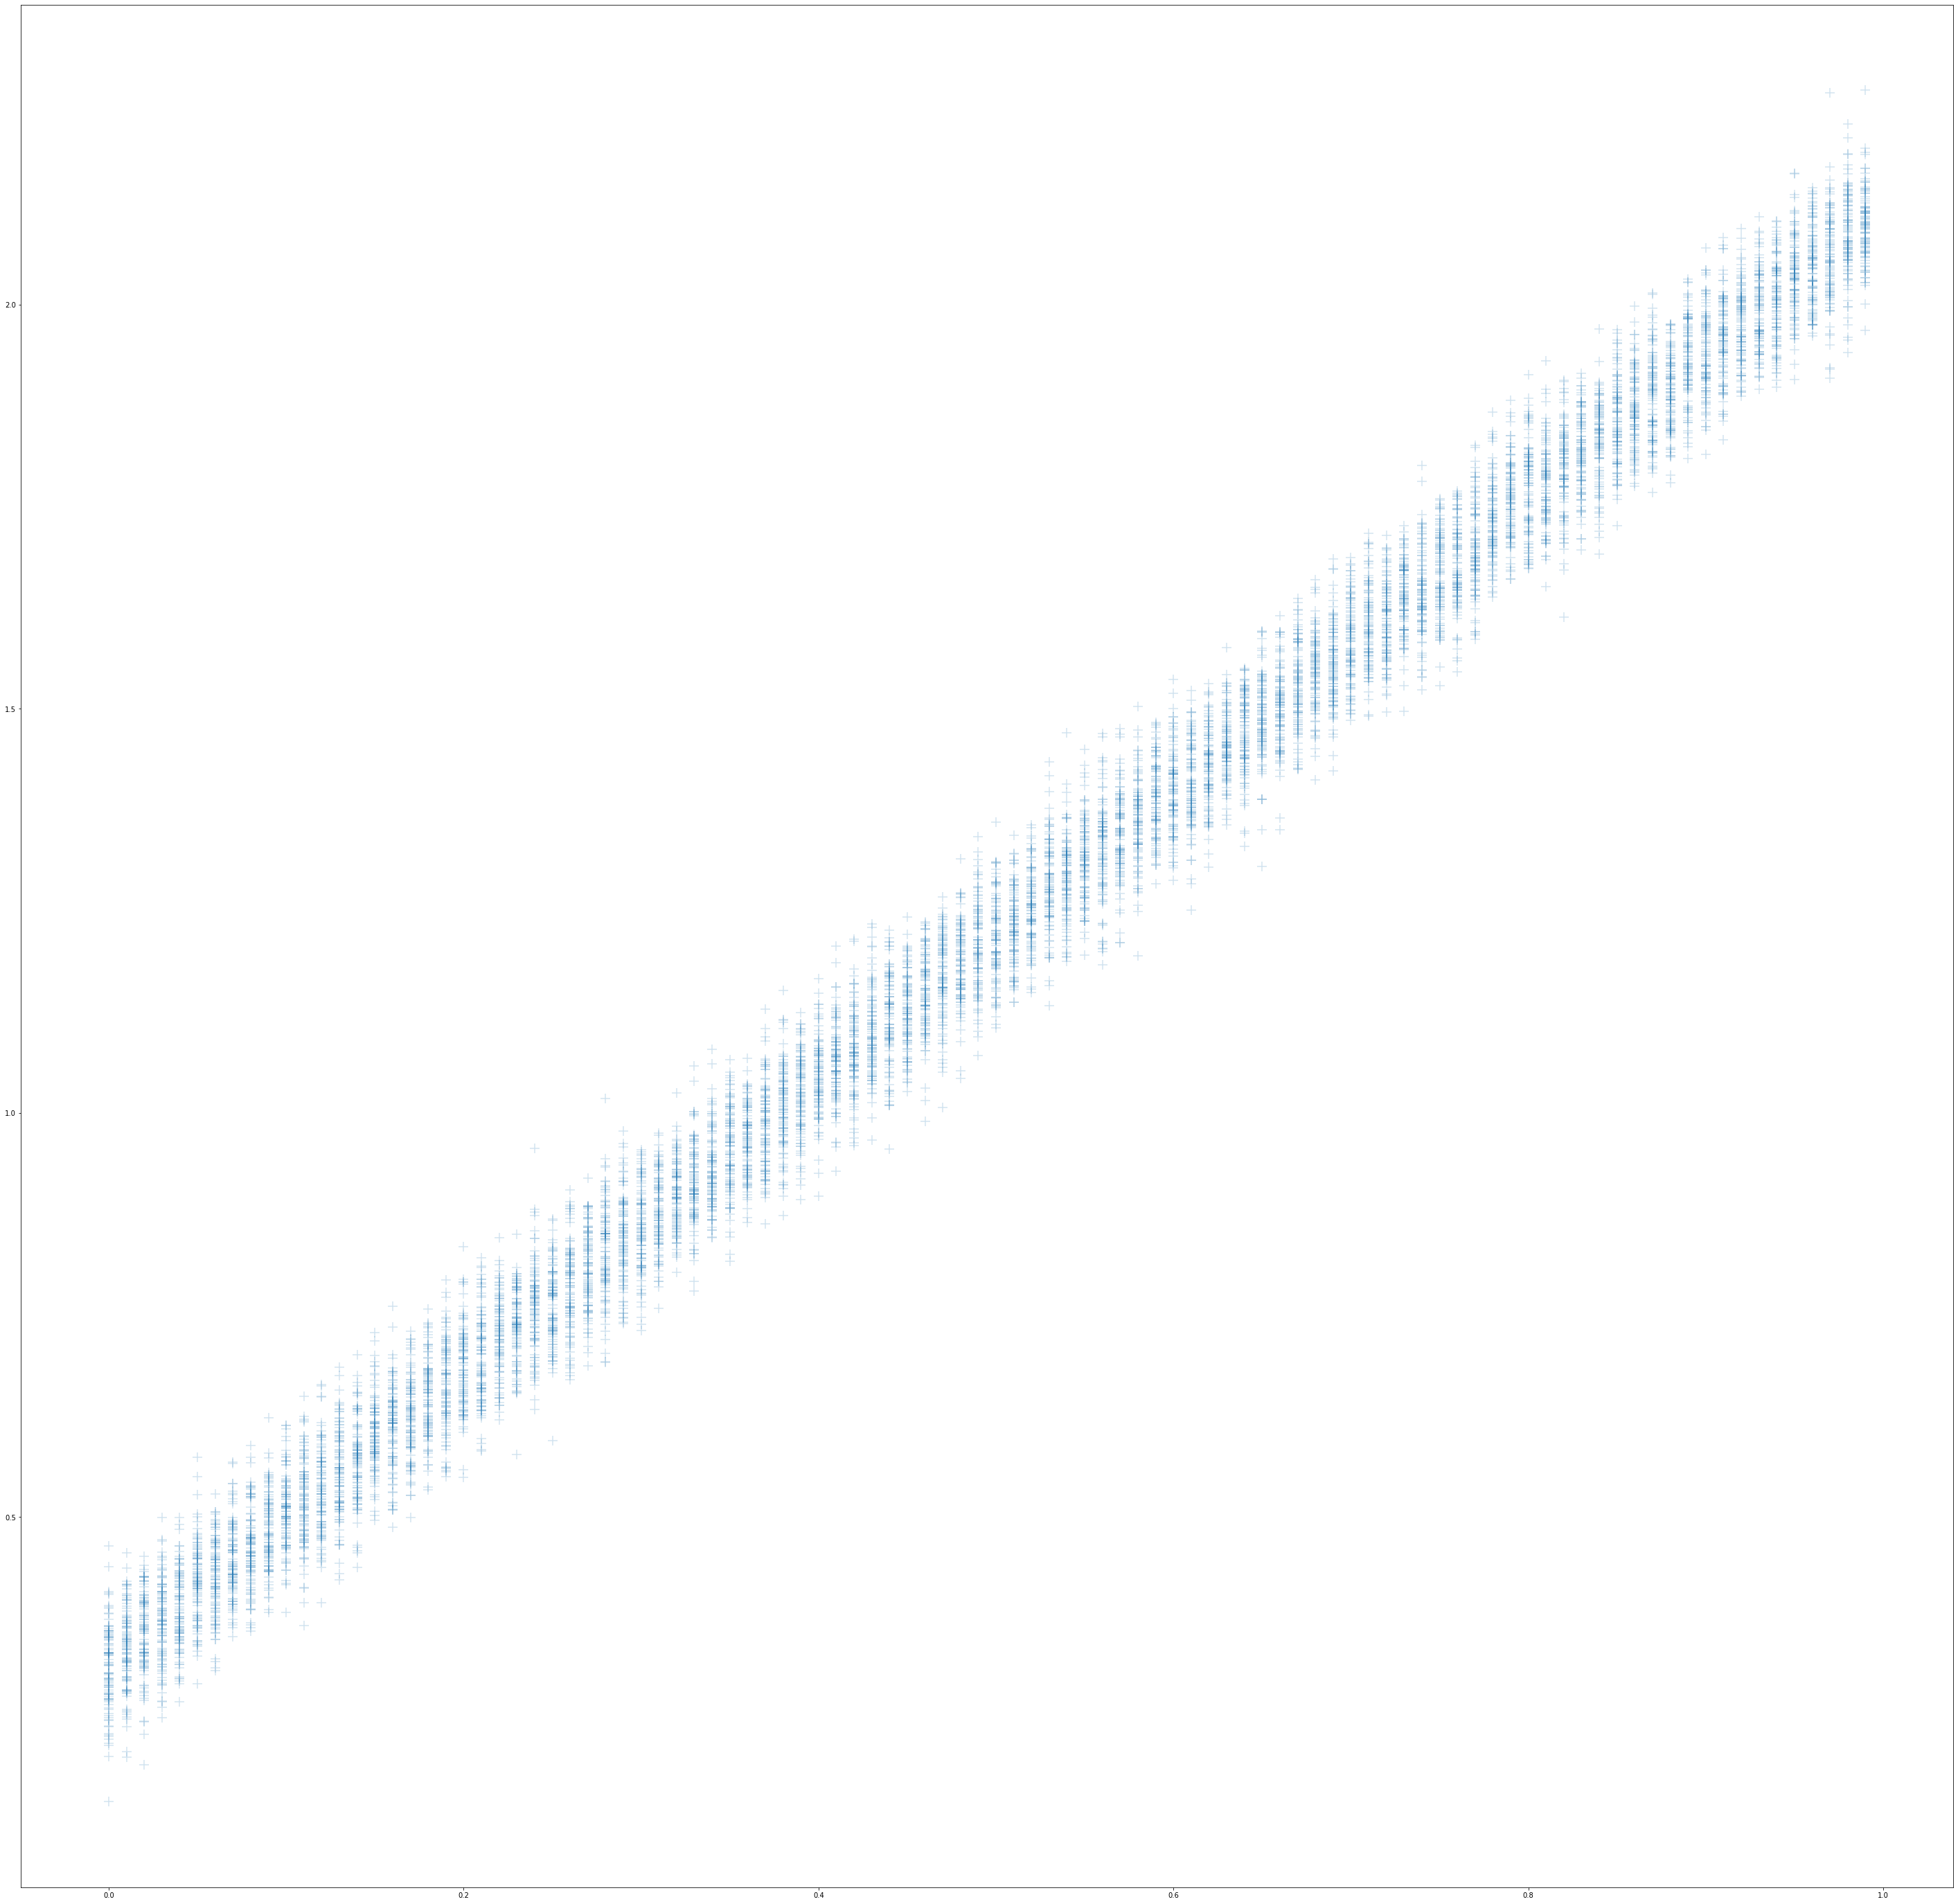

In [ ]:
#데이터분포를 좀더 크게 확인
fig = plt.figure(figsize=(50,50))  
ax = fig.add_subplot(111)
ax.scatter(x=noised_scaled_data_C,
           y=noised_scaled_data_F,
           alpha=0.2, s=200, marker='+')
plt.show()

In [ ]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(1,)))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='rmsprop')
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(model2.predict([0.01]))

[[0.01277452]]


In [ ]:
fit_hist = model2.fit(noised_scaled_data_C,
                      noised_scaled_data_F, epochs=20) #데이터가 많기 때문에 20번만 학습 (문제집 20번만 풀어라!)

Epoch 1/20
313/313 [==============================] - 1s 1ms/step - loss: 0.1476
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 10/20
313/313 [==============================] - 0s 891us/step - loss: 0.0025
Epoch 11/20
313/313 [==============================] - 0s 849us/step - loss: 0.0025
Epoch 12/20
313/313 [==============================] - 0s 818us/step - loss: 0.0025
Epoch 13/20
313/313

In [ ]:
model2.save('noised_after_learning.h5')

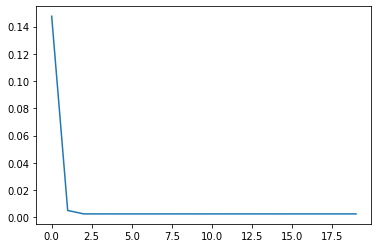

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [ ]:
print(model2.predict([0.01]))

[[0.34033287]]
